In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-student-academic-trends/student_exam_scores.csv


## **Imports and Reading-in Data**

In [2]:
df = pd.read_csv('/kaggle/input/analyzing-student-academic-trends/student_exam_scores.csv')

# **Data Understanding**
* Dataframe `shape`
* `head` and `tail`
* `dtypes`
* `describe`

In [3]:
df.shape

(200, 6)

In [4]:
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [5]:
df.tail()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0
199,S200,10.2,6.3,97.4,68,37.8


In [6]:
df.dtypes

student_id             object
hours_studied         float64
sleep_hours           float64
attendance_percent    float64
previous_scores         int64
exam_score            float64
dtype: object

# **Data Preparation**
* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns
* Feature Creation

In [7]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [8]:
# Check if there are null values
df.isna()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [9]:
# Check for the total number of null values in each column
df.isna().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [10]:
# Check for duplicate entries
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [11]:
# Locate the duplicate rows
df.loc[df.duplicated()]

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score


In [12]:
# Remove duplicates
df = df.drop_duplicates()

# Check for outliers
print(df.describe())

       hours_studied  sleep_hours  attendance_percent  previous_scores  \
count     200.000000   200.000000          200.000000       200.000000   
mean        6.325500     6.622000           74.830000        66.800000   
std         3.227317     1.497138           14.249905        15.663869   
min         1.000000     4.000000           50.300000        40.000000   
25%         3.500000     5.300000           62.200000        54.000000   
50%         6.150000     6.700000           75.250000        67.500000   
75%         9.000000     8.025000           87.425000        80.000000   
max        12.000000     9.000000          100.000000        95.000000   

       exam_score  
count  200.000000  
mean    33.955000  
std      6.789548  
min     17.100000  
25%     29.500000  
50%     34.050000  
75%     38.750000  
max     51.300000  


# **Feature Understanding**
(Univariate analysis)

* Plotting Feature Distributions
* Histogram
* KDE
* Boxplot

In [13]:
df.columns

Index(['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent',
       'previous_scores', 'exam_score'],
      dtype='object')

In [14]:
# This created issues for me
df['exam_score'].sort_values(ascending=False)\
.head(10)

86     51.3
83     48.9
60     48.6
120    47.9
71     47.9
193    46.7
53     46.4
115    46.4
20     46.0
146    45.8
Name: exam_score, dtype: float64

Text(0, 0.5, 'Exam Scores')

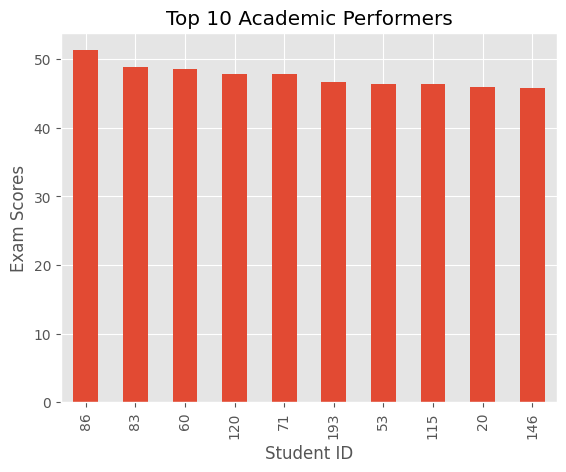

In [15]:
# first diagram I got
ax = df['exam_score'].sort_values(ascending = False) \
    .head(10) \
    .plot(kind='bar', title='Top 10 Academic Performers')
ax.set_xlabel('Student ID')
ax.set_ylabel('Exam Scores')

Text(0, 0.5, 'Exam Scores')

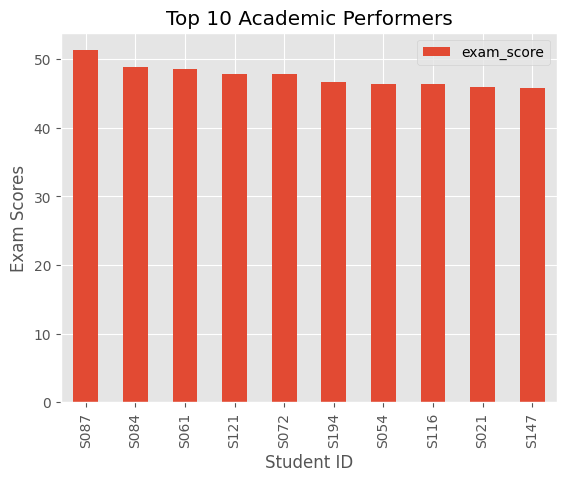

In [16]:
# Filter DataFrame to find 10 students
top_students = df.sort_values('exam_score', ascending=False).head(10)

# Plot a bar chart 
ax = top_students.plot(x='student_id', y='exam_score', kind='bar', 
                       title='Top 10 Academic Performers')
ax.set_xlabel('Student ID')
ax.set_ylabel('Exam Scores')

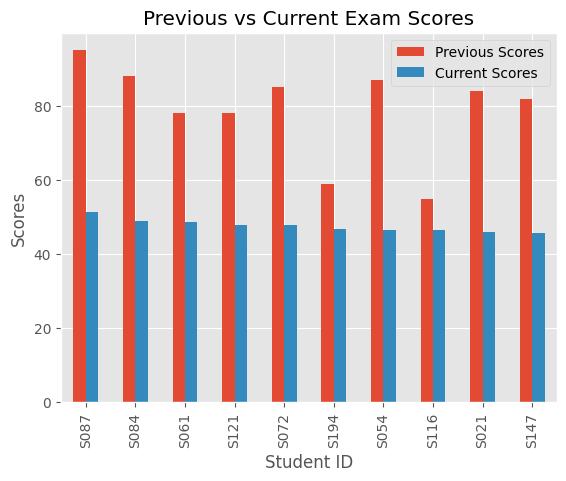

In [17]:
# Comparing previous scores with recent ones
ax = top_students.plot(x='student_id', y=['previous_scores', 'exam_score'], 
                       kind='bar',
                       title='Previous vs Current Exam Scores')
ax.set_xlabel('Student ID')
ax.set_ylabel('Scores')
ax.legend(['Previous Scores', 'Current Scores'])
plt.show()

# **Feature Relationships**
* Scatterplot
* Heatmap Correlation
* Pairplot
* Groupby comparisons

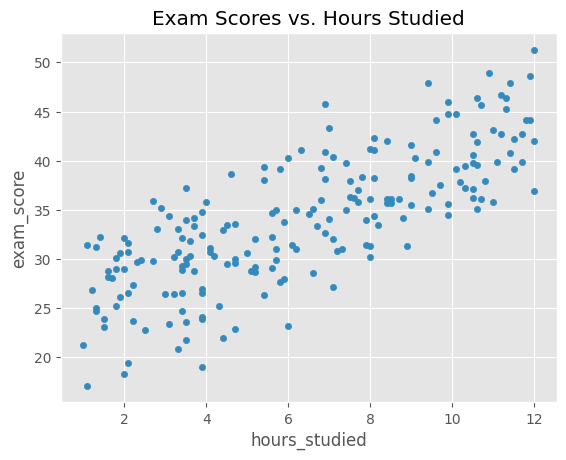

In [18]:
# Examine the relationship between study hours and scores
df.plot(kind='scatter',
        x='hours_studied',
        y='exam_score',
        title='Exam Scores vs. Hours Studied')
plt.show()

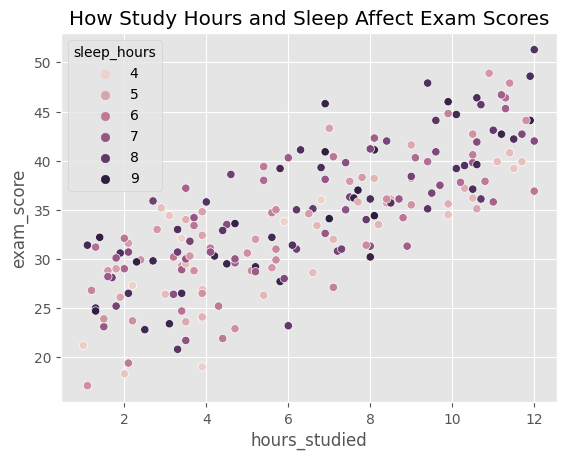

In [19]:
# Investigate the relationship between study and sleep hours, and scores
ax = sns.scatterplot(x='hours_studied',
                y='exam_score',
                hue='sleep_hours',
                data=df)
ax.set_title('How Study Hours and Sleep Affect Exam Scores')
plt.show()

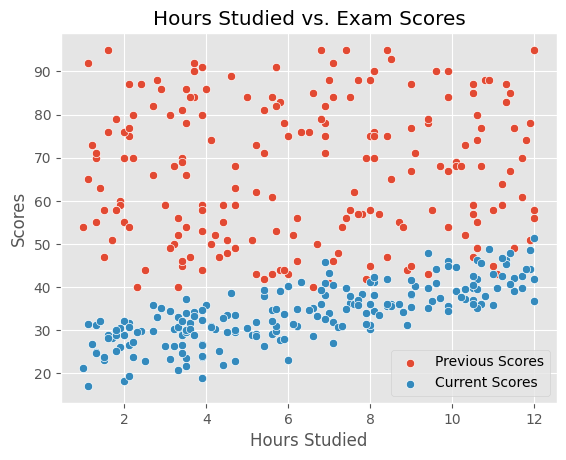

In [20]:
# Look for relationships between study hours, and recent and previous scores
ax = sns.scatterplot(data=df, x='hours_studied', y='previous_scores', label='Previous Scores')
sns.scatterplot(data=df, x='hours_studied', y='exam_score', label='Current Scores', ax=ax)
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Scores')
ax.set_title('Hours Studied vs. Exam Scores')
plt.show()

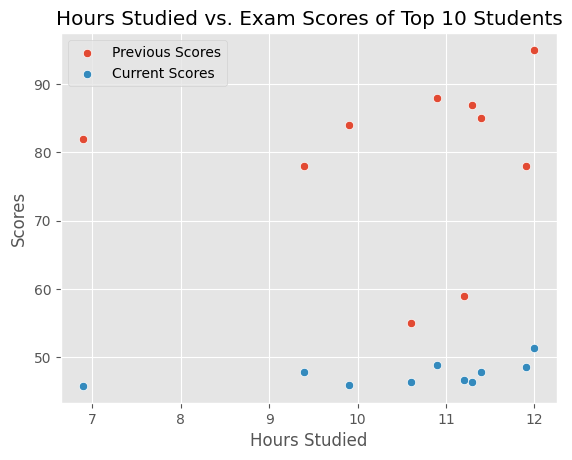

In [21]:
# Same as above, but limited to the top 10 students
ax = sns.scatterplot(data=top_students, x='hours_studied', y='previous_scores', label='Previous Scores')
sns.scatterplot(data=top_students, x='hours_studied', y='exam_score', label='Current Scores', ax=ax)
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Scores')
ax.set_title('Hours Studied vs. Exam Scores of Top 10 Students')
plt.show()

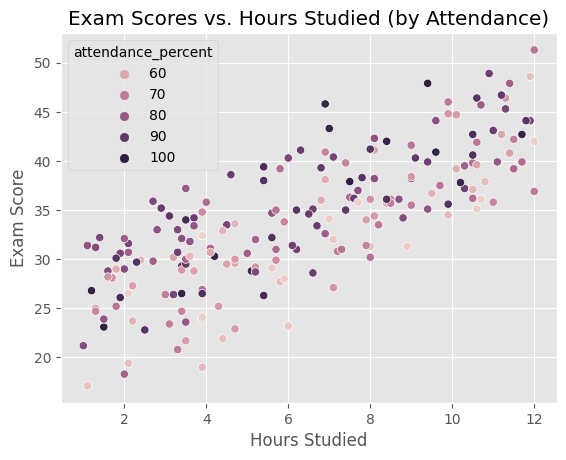

In [22]:
# To look  for a relationship between study hours, exam scores and attendance
ax = sns.scatterplot(x='hours_studied',
                     y='exam_score',
                     hue='attendance_percent',
                     data=df)
ax.set_title('Exam Scores vs. Hours Studied (by Attendance)')
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Exam Score')
plt.show()

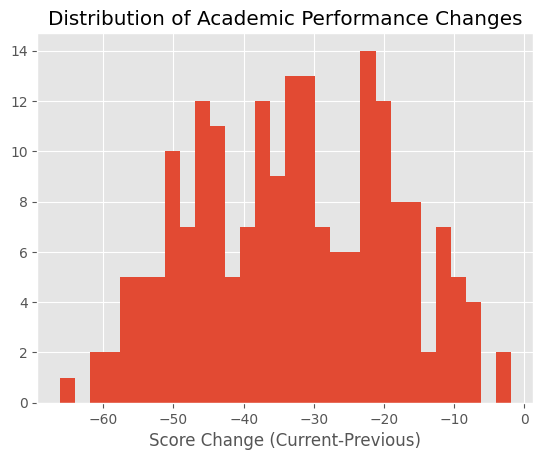

In [23]:
# Look into the academic performance of the current and previous exams
df['score_change'] = df['exam_score'] - df['previous_scores']

# Visualise performance changes
df['score_change'].hist(bins=30)
plt.title('Distribution of Academic Performance Changes')
plt.xlabel('Score Change (Current-Previous)')
plt.show()

In [24]:
# For students who declined only
declined = df[df['score_change'] < 0]

In [25]:
# Compare
print("Average Study Hours of Declined Students:", declined['hours_studied'].mean())
print("Average Study Hours of All Students:", df['hours_studied'].mean())

Average Study Hours of Declined Students: 6.3255
Average Study Hours of All Students: 6.3255


*No difference. It looks like all the students performed poorly compared with the last examination.*

In [26]:
# Further comparisons
print("Average Sleep Hours of Declined Students:", declined['sleep_hours'].mean())
print("Average Sleep Hours of All Students:", df['sleep_hours'].mean())

Average Sleep Hours of Declined Students: 6.622000000000001
Average Sleep Hours of All Students: 6.622000000000001


*No difference*

In [27]:
print("Average Attendance of Declined Students:", declined['attendance_percent'].mean())
print("Average Attendance of All Students:", df['attendance_percent'].mean())

Average Attendance of Declined Students: 74.83
Average Attendance of All Students: 74.83


# **Question**

**What Could've Caused Such Decline In Student Scores?**

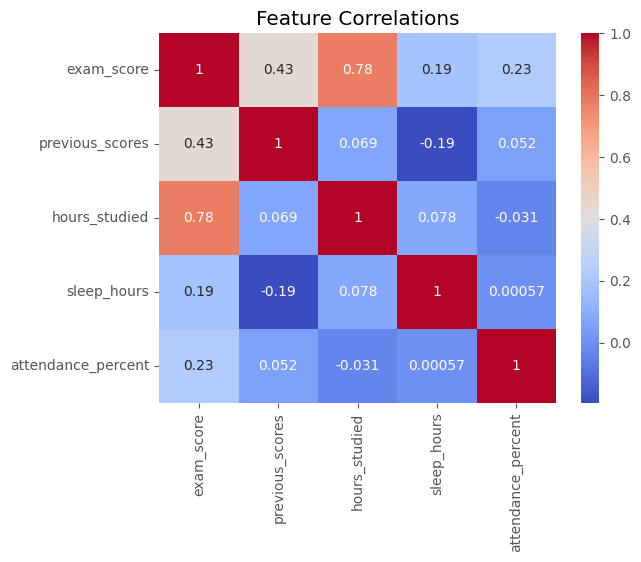

In [28]:
correlation = df[['exam_score', 'previous_scores', 'hours_studied', 'sleep_hours', 'attendance_percent']].corr()

sns.heatmap(correlation, annot=True, cmap = 'coolwarm')
plt.title('Feature Correlations')
plt.show()

In [29]:
# What factors correlate most with exam scores?
exam_score_correlations = correlation['exam_score'].sort_values(ascending=False)
print("Factors Most Correlated with Exam Scores: ")
print(exam_score_correlations)

Factors Most Correlated with Exam Scores: 
exam_score            1.000000
hours_studied         0.776751
previous_scores       0.431105
attendance_percent    0.225713
sleep_hours           0.188222
Name: exam_score, dtype: float64


# **Conclusions**

## Key Findings:
1. **The Score Decline is Widespread**: The histogram shows that most students performed 
   worse on the current exam vs the previous.

2. **Study Hours Don't Explain It**: Declined students studied the same amount 
   as others (6.32 hours on average)

3. **Strongest Correlations** (from heatmap):
   - The hours studied have a correlation of 0.77 with the exam scores.

## Potential Cause:
- The difficulty of the exam may have increased

## Recommendations:
- Investigate exam difficulty differences